Define The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Import The Dataset

In [ ]:
# to Solve The Problem of The Path use r Before The Path or (\\) in The Path After E:
df=pd.read_csv(r'Food_Inspections_20250628.csv')

In [3]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1068208,CHINA COURT RESTAURANT,CHINA COURT RESTAURANT,2141795.0,Restaurant,Risk 1 (High),1146 N MILWAUKEE AVE,CHICAGO,IL,60642.0,03/14/2012,License Re-Inspection,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.902462,-87.665306,"(41.902462266949634, -87.66530609467256)"
1,1072213,CUDDLE CARE,CUDDLE CARE,1622366.0,Daycare Above and Under 2 Years,Risk 1 (High),4800 S LAKE PARK AVE,CHICAGO,IL,60615.0,10/22/2012,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.807922,-87.590693,"(41.80792179224785, -87.5906931090992)"
2,1072214,CUDDLE CARE,CUDDLE CARE,1622365.0,Daycare Above and Under 2 Years,Risk 1 (High),4800 S LAKE PARK AVE,CHICAGO,IL,60615.0,10/22/2012,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.807922,-87.590693,"(41.80792179224785, -87.5906931090992)"
3,1072228,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,2069562.0,Restaurant,Risk 2 (Medium),101 E 51ST ST,CHICAGO,IL,60615.0,10/26/2012,Short Form Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.801892,-87.622566,"(41.80189221533366, -87.62256558837282)"
4,1072252,SALAAM RESTAURANT AND BAKERY,SALAAM RESTAURANT AND BAKERY,2141327.0,Restaurant,Risk 1 (High),700-706 W 79TH ST,CHICAGO,IL,60620.0,01/24/2013,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.750787,-87.641667,"(41.750787498480555, -87.64166664542023)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293264 entries, 0 to 293263
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    293264 non-null  int64  
 1   DBA Name         293264 non-null  object 
 2   AKA Name         290850 non-null  object 
 3   License #        293246 non-null  float64
 4   Facility Type    288035 non-null  object 
 5   Risk             293181 non-null  object 
 6   Address          293264 non-null  object 
 7   City             293103 non-null  object 
 8   State            293205 non-null  object 
 9   Zip              293223 non-null  float64
 10  Inspection Date  293264 non-null  object 
 11  Inspection Type  293263 non-null  object 
 12  Results          293264 non-null  object 
 13  Violations       211789 non-null  object 
 14  Latitude         292256 non-null  float64
 15  Longitude        292256 non-null  float64
 16  Location         292256 non-null  obje

In [5]:
df.isnull().sum().sort_values(ascending=False)

Violations         81475
Facility Type       5229
AKA Name            2414
Location            1008
Longitude           1008
Latitude            1008
City                 161
Risk                  83
State                 59
Zip                   41
License #             18
Inspection Type        1
Inspection Date        0
Results                0
DBA Name               0
Address                0
Inspection ID          0
dtype: int64

In [6]:
df.duplicated().sum()

0

Data Cleaning

In [7]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'], errors='coerce')


In [8]:
df = df.dropna(subset=['Latitude', 'Longitude'])


In [9]:
df = df.drop(columns=['AKA Name', 'Location'])


In [10]:
df['Facility Type'] = df['Facility Type'].fillna('Unknown')
df['Risk'] = df['Risk'].fillna('Unknown')
df['Results'] = df['Results'].fillna('Unknown')


In [11]:
print(df.shape)
print(df.isnull().sum())


(292256, 15)
Inspection ID          0
DBA Name               0
License #             18
Facility Type          0
Risk                   0
Address                0
City                 158
State                 59
Zip                   38
Inspection Date        0
Inspection Type        1
Results                0
Violations         81180
Latitude               0
Longitude              0
dtype: int64


In [12]:
df = df.drop(columns=['License #'])


In [13]:
df = df.dropna(subset=['City', 'State', 'Zip'])


In [14]:
df = df.dropna(subset=['Inspection Type'])


In [15]:
df['Has_Violations'] = df['Violations'].notnull().astype(int)


In [16]:
print(df.shape)
print(df.isnull().sum())

(292052, 15)
Inspection ID          0
DBA Name               0
Facility Type          0
Risk                   0
Address                0
City                   0
State                  0
Zip                    0
Inspection Date        0
Inspection Type        0
Results                0
Violations         81064
Latitude               0
Longitude              0
Has_Violations         0
dtype: int64


EDA 

Results
Pass                    150788
Fail                     56572
Pass w/ Conditions       43937
Out of Business          24296
No Entry                 12462
Not Ready                 3910
Business Not Located        87
Name: count, dtype: int64


C:\Users\New Shop\AppData\Local\Temp\ipykernel_14320\380929719.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Results', order=df['Results'].value_counts().index, palette='Set2')


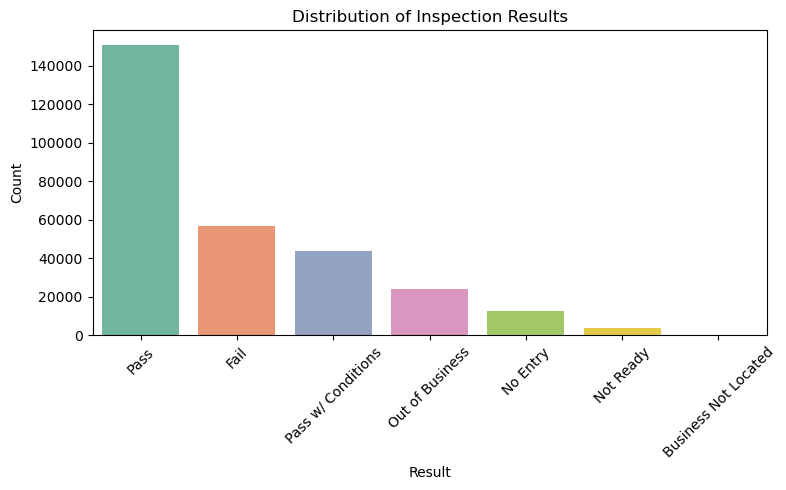

In [ ]:
#Basic distribution of inspection results
print(df['Results'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Results', order=df['Results'].value_counts().index, palette='Set2')
plt.title("Distribution of Inspection Results")
plt.xlabel("Result")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


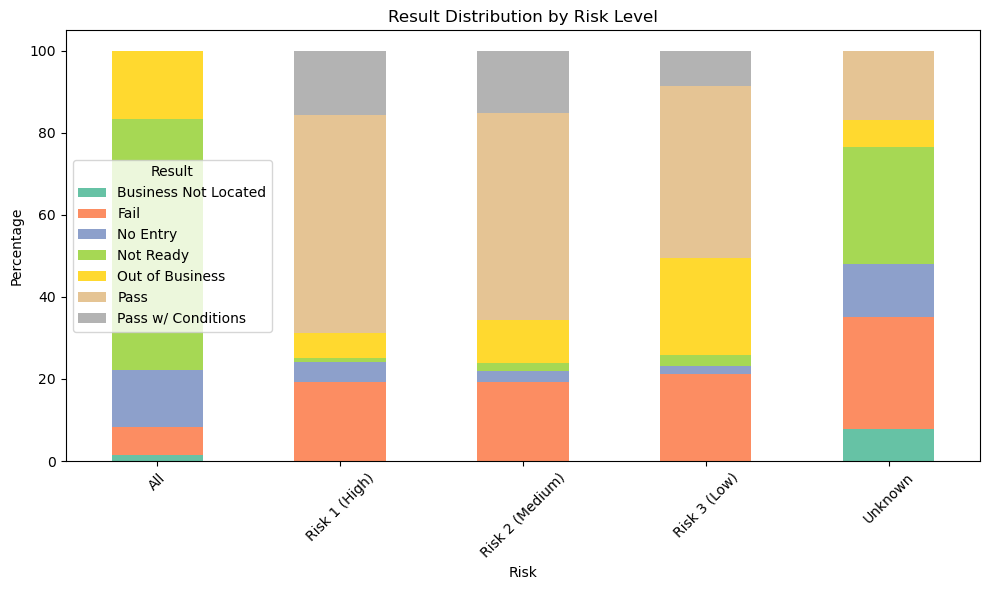

In [18]:
#Relationship between Risk and Results
risk_result = pd.crosstab(df['Risk'], df['Results'], normalize='index') * 100

risk_result.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Result Distribution by Risk Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Result')
plt.tight_layout()
plt.show()


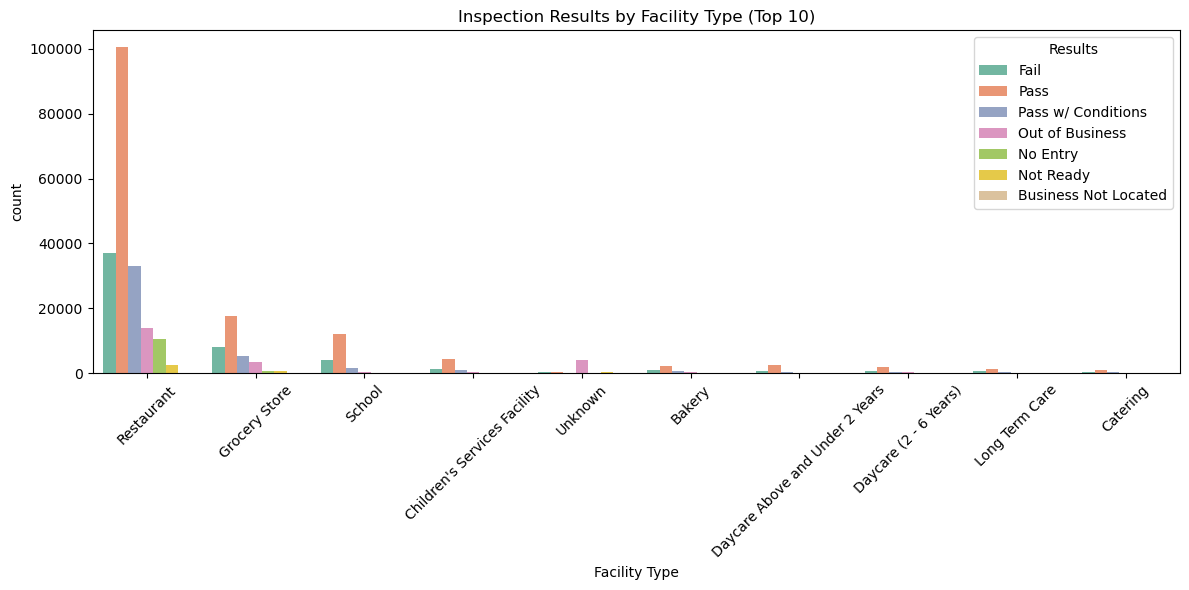

In [19]:
#Relationship between Facility Type and Results
top_facilities = df['Facility Type'].value_counts().nlargest(10).index
subset = df[df['Facility Type'].isin(top_facilities)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='Facility Type', hue='Results', order=top_facilities, palette='Set2')
plt.title("Inspection Results by Facility Type (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


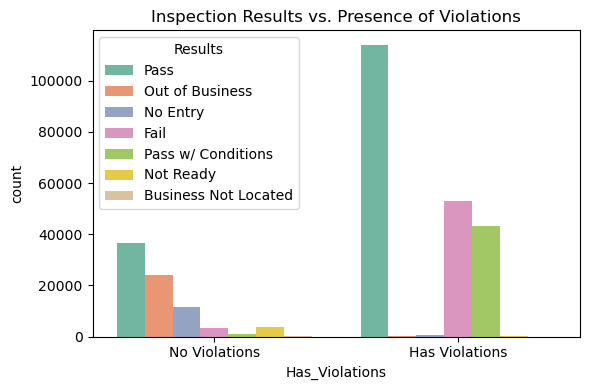

In [20]:
#Relationship between Has_Violations and Results
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Has_Violations', hue='Results', palette='Set2')
plt.title("Inspection Results vs. Presence of Violations")
plt.xticks([0,1], ['No Violations', 'Has Violations'])
plt.tight_layout()
plt.show()


Predictive Modeling

In [21]:
df['Results'].value_counts()


Results
Pass                    150788
Fail                     56572
Pass w/ Conditions       43937
Out of Business          24296
No Entry                 12462
Not Ready                 3910
Business Not Located        87
Name: count, dtype: int64

In [22]:
df_model = df[df['Results'].isin(['Pass', 'Fail'])].copy()
df_model['Target'] = df_model['Results'].map({'Pass': 1, 'Fail': 0})

In [23]:

df_model = df[df['Results'].isin(['Pass', 'Fail'])].copy()

df_model['Target'] = df_model['Results'].map({'Pass': 1, 'Fail': 0})

print(df_model.shape)
df_model[['Risk', 'Facility Type', 'Inspection Type', 'City', 'Has_Violations', 'Target']].head()


(207360, 16)


,Risk,Facility Type,Inspection Type,City,Has_Violations,Target
0,Risk 1 (High),Restaurant,License Re-Inspection,CHICAGO,1,0
1,Risk 1 (High),Daycare Above and Under 2 Years,Canvass,CHICAGO,1,1
2,Risk 1 (High),Daycare Above and Under 2 Years,Canvass,CHICAGO,1,1
3,Risk 2 (Medium),Restaurant,Short Form Complaint,CHICAGO,1,1
4,Risk 1 (High),Restaurant,Canvass,CHICAGO,1,1


In [24]:
X = df_model[['Risk', 'Facility Type', 'Inspection Type', 'City', 'Has_Violations']]
y = df_model['Target']
categorical_cols = ['Risk', 'Facility Type', 'Inspection Type', 'City']
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression(max_iter=500))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)


d:\Anaconda_2024\Anaconda_Package\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Risk', 'Facility Type',
                                                   'Inspection Type',
                                                   'City'])])),
                ('classifier', LogisticRegression(max_iter=500))])

In [25]:
y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 2015  9198]
 [ 1932 28327]]
              precision    recall  f1-score   support

           0       0.51      0.18      0.27     11213
           1       0.75      0.94      0.84     30259

    accuracy                           0.73     41472
   macro avg       0.63      0.56      0.55     41472
weighted avg       0.69      0.73      0.68     41472

